In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [41]:
def plot_bar_charts(res_tab, ordered=False):
    def preproc_name(method, reg, score):
        name = method[0]
        if score not in ['MD', 'MP']:
            name += f'+{score[0]}'
        if reg != '-':
            name += f'+{reg[0]}'
        return name
   
    datasets = np.unique([col[0] for col in list(res_tab.columns[3:])])
    metrics = np.unique([col[1] for col in list(res_tab.columns[3:])])
    
    for dataset in datasets:
        n_methods = len(res_tab['Method'].values)
        fig = plt.figure(figsize = (n_methods, 5))
        gs = fig.add_gridspec(1, len(metrics))
        for i, metric in enumerate(metrics):
            means = np.array([float(value.split('±')[0]) for value in res_tab[(dataset, metric)].values])
            stds = np.array([float(value.split('±')[1]) for value in res_tab[(dataset, metric)].values])

            methods = res_tab['Method'].values
            regs = res_tab['Reg. Type'].values
            scores = res_tab['UE Score'].values
            names =  np.array([preproc_name(m,r,s) for m,r,s in zip(methods, regs, scores)])

            ax = fig.add_subplot(gs[0, i])

            cmap = matplotlib.cm.get_cmap('Spectral')
            colors = []
            for i in range(cmap.N):
                rgb = cmap(i)[:3]
                colors.append(matplotlib.colors.rgb2hex(rgb))
            colors = colors[::len(colors) // len(names)]
            x_pos = np.array(list(range(len(names))))
            if ordered:
                order = np.argsort(means)[::-1]
            else:
                order = x_pos
            ax.bar(x_pos, means[order], yerr=stds[order], width=0.8, align='center', alpha=1, color=colors, edgecolor='black', ecolor='black', capsize=6)
            ax.set_ylabel(f'{metric.upper()}')
            ax.set_xticks(x_pos)
            ax.set_xticklabels(x_pos[order])

            ax.tick_params(labelsize=8)
            ax.set_title(f'{metric.upper()} for {dataset}')
            ax.yaxis.grid(True)
            patches = [matplotlib.patches.Patch(color=v, label=f'{x}. {k}') for x, k, v in zip(x_pos, names, colors)]
        plt.tight_layout()
        plt.legend(handles=patches, loc='center', fontsize=10, bbox_to_anchor=(-0.1, -0.16), ncol=4, edgecolor='black')
        plt.savefig(f'../../new_{dataset}.pdf', bbox_inches='tight')
        plt.savefig(f'../../new_{dataset}.png', bbox_inches='tight')
        plt.show()

In [107]:
res_tab = pd.read_csv('../../new_conll2003.csv', header=[0, 1])

In [108]:
res_tab = res_tab.iloc[[1,10,19,22,28,31,32,39,41,43]]
res_tab = res_tab[res_tab.columns[[0,1,2,4,5,7,8]]]

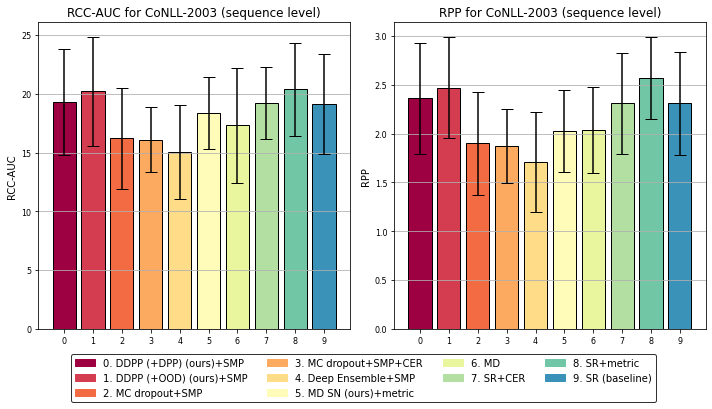

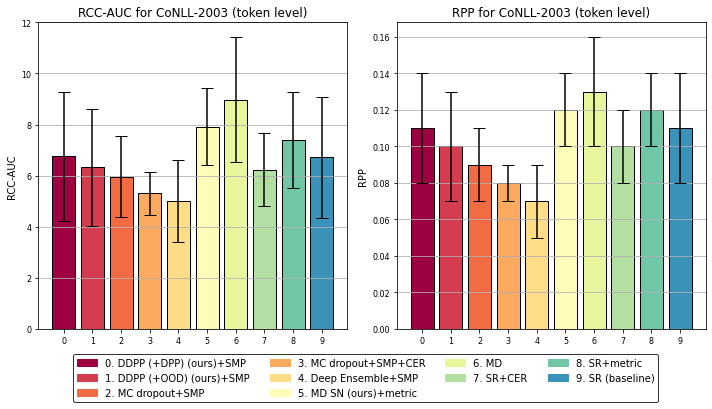

In [44]:
plot_bar_charts(res_tab, ordered=False)

In [113]:
res_tab = pd.read_csv('../../deberta_all_glue.csv', header=[0, 1])

In [ ]:
mrpc_tab = res_tab[res_tab.columns[[0,1,2,4,5]]]
mrpc_tab = mrpc_tab.iloc[[4,23,27,28,29,33,54,58,63,62]]

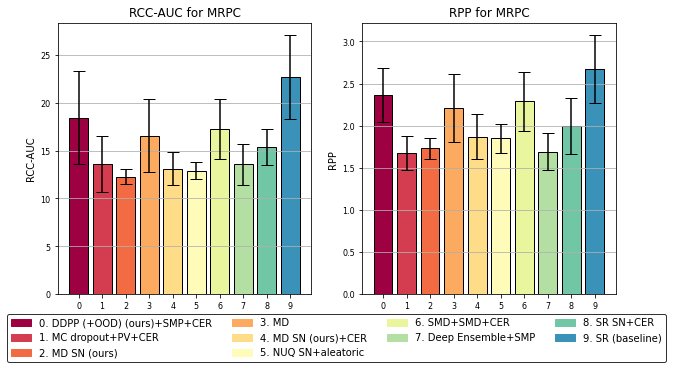

In [ ]:
plot_bar_charts(mrpc_tab, ordered=False)

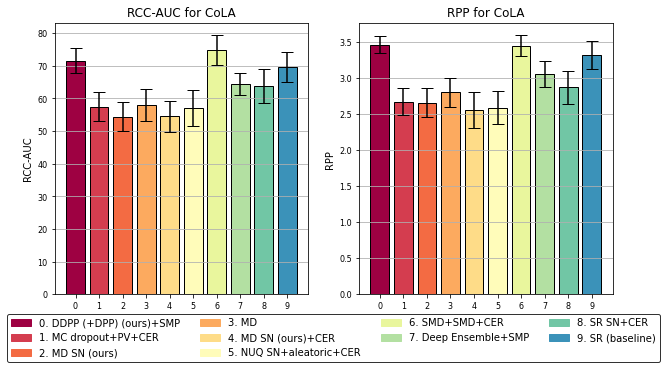

In [ ]:
cola_tab = res_tab[res_tab.columns[[0,1,2,7,8]]]
cola_tab = cola_tab.iloc[[10,23,27,28,29,39,54,58,63,62]]
plot_bar_charts(cola_tab, ordered=False)

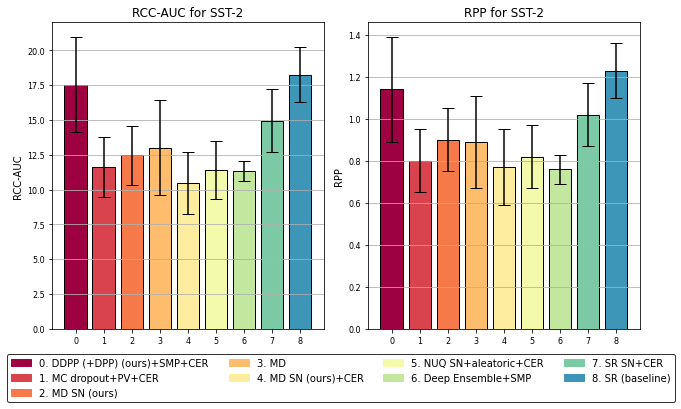

In [114]:
sst2_tab = res_tab[res_tab.columns[[0,1,2,10,11]]]
sst2_tab = sst2_tab.iloc[[13,23,27,28,29,39,58,63,62]]
plot_bar_charts(sst2_tab, ordered=False)

In [111]:
res_tab = pd.read_csv('../../deberta_all_conll2003.csv', header=[0, 1])

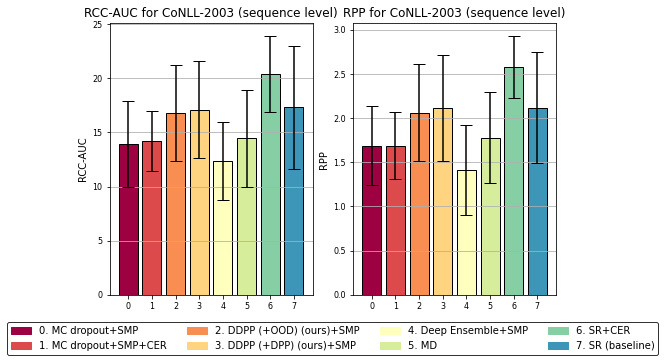

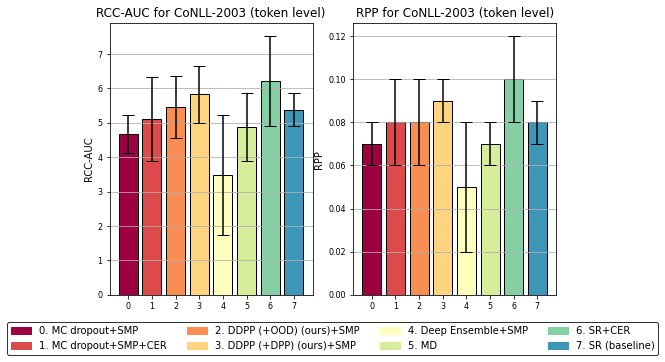

In [ ]:
table_final = res_tab[res_tab.columns[[0,1,2,4,5,7,8]]]
table_final = table_final.iloc[[19,22,1,10,58,28,63,61]].reset_index(drop=True)
plot_bar_charts(table_final, ordered=False)

In [116]:
sst2_tab = sst2_tab.reset_index(drop=True)

In [119]:
sst2_tab.loc[0, 'Reg. Type'] = '-'
sst2_tab.loc[0, 'UE Score'] = 'PV'
sst2_tab.loc[0, ('SST-2', 'rcc-auc')] = '17.04±2.72'
sst2_tab.loc[0, ('SST-2', 'rpp')] = '1.14±0.21'

sst2_tab.loc[1, 'Reg. Type'] = '-'
sst2_tab.loc[1, 'UE Score'] = 'SMP'
sst2_tab.loc[1, ('SST-2', 'rcc-auc')] = '13.12±3.27'
sst2_tab.loc[1, ('SST-2', 'rpp')] = '0.88±0.17'

sst2_tab.loc[2, ('SST-2', 'rcc-auc')] = '12.16±1.93'
sst2_tab.loc[2, ('SST-2', 'rpp')] = '0.83±0.11'

sst2_tab.loc[3, 'Reg. Type'] = 'CER'
sst2_tab.loc[3, ('SST-2', 'rcc-auc')] = '12.90±3.55'
sst2_tab.loc[3, ('SST-2', 'rpp')] = '0.87±0.23'

sst2_tab.loc[4, ('SST-2', 'rcc-auc')] = '10.89±1.25'
sst2_tab.loc[4, ('SST-2', 'rpp')] = '0.75±0.06'

sst2_tab.loc[6, ('SST-2', 'rcc-auc')] = '13.43±1.84'
sst2_tab.loc[6, ('SST-2', 'rpp')] = '0.87±0.08'


sst2_tab.loc[7, 'Method'] = 'SR'
sst2_tab.loc[7, ('SST-2', 'rcc-auc')] = '16.68±2.92'
sst2_tab.loc[7, ('SST-2', 'rpp')] = '1.11±0.24'

sst2_tab.loc[8, ('SST-2', 'rcc-auc')] = '18.07±6.11'
sst2_tab.loc[8, ('SST-2', 'rpp')] = '1.23±0.41'

In [121]:
sst2_tab = sst2_tab.iloc[[0,1,2,3,4,6,7,8]]

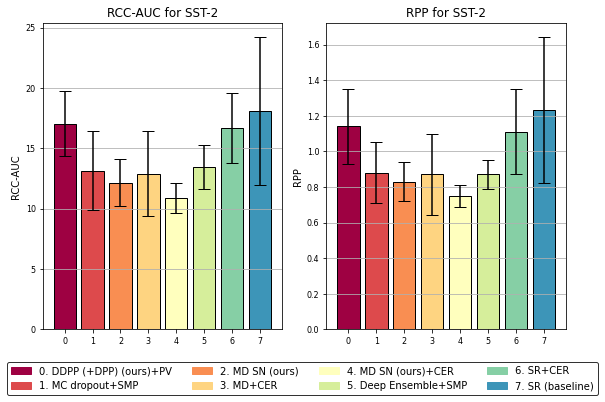

In [122]:
plot_bar_charts(sst2_tab, ordered=False)

In [223]:
df = pd.DataFrame({'Method':['baseline', 'MC dropout', 'Deep Ensemble'],
                   'UE Score':['MP', 'SMP', 'SMP'],
                   '0%':['43.3±0.2', '43.8±0.2', '44.8±0.2'],
                   '5%':['44.7±0.3', '45.4±0.3', '46.5±0.2'],
                   '10%':['46.4±0.3', '47.0±0.3', '48.2±0.3'],
                   '20%':['49.4±0.1', '50.2±0.4', '51.4±0.3'],
                   '30%':['52.9±0.3', '53.6±0.4', '54.8±0.3'],
                   '40%':['56.6±0.3', '57.5±0.5', '58.8±0.3'],})

In [224]:
df

,Method,UE Score,0%,5%,10%,20%,30%,40%
0,baseline,MP,43.3±0.2,44.7±0.3,46.4±0.3,49.4±0.1,52.9±0.3,56.6±0.3
1,MC dropout,SMP,43.8±0.2,45.4±0.3,47.0±0.3,50.2±0.4,53.6±0.4,57.5±0.5
2,Deep Ensemble,SMP,44.8±0.2,46.5±0.2,48.2±0.3,51.4±0.3,54.8±0.3,58.8±0.3


In [228]:
print(str(df.to_latex(index=False)).replace('±', '$\pm$'))

\begin{tabular}{llllllll}
\toprule
       Method & UE Score &       0\% &       5\% &      10\% &      20\% &      30\% &      40\% \\
\midrule
     baseline &       MP & 43.3$\pm$0.2 & 44.7$\pm$0.3 & 46.4$\pm$0.3 & 49.4$\pm$0.1 & 52.9$\pm$0.3 & 56.6$\pm$0.3 \\
   MC dropout &      SMP & 43.8$\pm$0.2 & 45.4$\pm$0.3 & 47.0$\pm$0.3 & 50.2$\pm$0.4 & 53.6$\pm$0.4 & 57.5$\pm$0.5 \\
Deep Ensemble &      SMP & 44.8$\pm$0.2 & 46.5$\pm$0.2 & 48.2$\pm$0.3 & 51.4$\pm$0.3 & 54.8$\pm$0.3 & 58.8$\pm$0.3 \\
\bottomrule
\end{tabular}

